In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

%matplotlib inline
sns.set()

In [8]:
height = [147, 150, 153, 158, 163, 165, 168, 170, 173, 175, 178, 180, 183]
weight = [49, 50, 51, 54, 58, 59, 60, 62, 63, 64, 66, 67, 68]

df = pd.DataFrame({
    'height': height,
    'weight': weight
})

df.head()

,height,weight
0,147,49
1,150,50
2,153,51
3,158,54
4,163,58


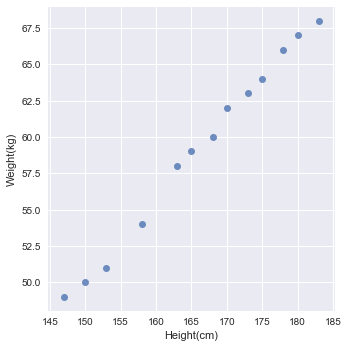

In [12]:
ax = sns.lmplot(x='height', y='weight', data=df, fit_reg=False)
ax.set(xlabel='Height(cm)', ylabel='Weight(kg)')

Text(0,0.5,'Weight(kg)')

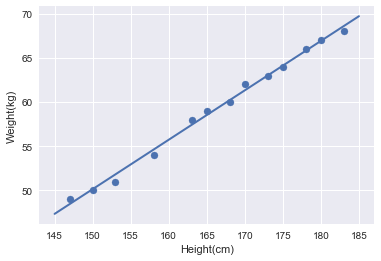

In [58]:
X = np.array(df[['height']])
y = np.array(df[['weight']])

one = np.ones((X.shape[0], 1))
Xbar = np.concatenate((one, X), axis=1)

A = np.dot(Xbar.T, Xbar)
b = np.dot(Xbar.T, y)

w = np.dot(np.linalg.pinv(A), b)
w0 = w[0][0]
w1 = w[1][0]

x0 = np.linspace(145, 185, 2, endpoint=True)

y0 = w0 + w1*x0

plt.plot(x0, y0, linewidth=2)
plt.scatter(x=df['height'], y=df['weight'])
plt.xlabel('Height(cm)')
plt.ylabel('Weight(kg)')

In [59]:
print('Predicted weight of person with height 155cm is', w0 + w1*155, 'and real value is 52')
print('Predicted weight of person with height 155cm is', w0 + w1*160, 'and real value is 56')

Predicted weight of person with height 155cm is 52.941358894844626 and real value is 52
Predicted weight of person with height 155cm is 55.73738370454248 and real value is 56


In [61]:
from sklearn import datasets, linear_model

regr = linear_model.LinearRegression(fit_intercept=False) # fit for bias
regr.fit(Xbar, y)

print('Solution solved by scikit-learn:', regr.coef_)
print('Solution found by code:', w.T)

Solution solved by scikit-learn: [[-33.73541021   0.55920496]]
Solution found by code: [[-33.73541021   0.55920496]]


In [42]:
?plt.plot

Signature: plt.plot(*args, **kwargs)
Docstring:
Plot lines and/or markers to the
:class:`~matplotlib.axes.Axes`.  *args* is a variable length
argument, allowing for multiple *x*, *y* pairs with an
optional format string.  For example, each of the following is
legal::

    plot(x, y)        # plot x and y using default line style and color
    plot(x, y, 'bo')  # plot x and y using blue circle markers
    plot(y)           # plot y using x as index array 0..N-1
    plot(y, 'r+')     # ditto, but with red plusses

If *x* and/or *y* is 2-dimensional, then the corresponding columns
will be plotted.

If used with labeled data, make sure that the color spec is not
included as an element in data, as otherwise the last case
``plot("v","r", data={"v":..., "r":...)``
can be interpreted as the first case which would do ``plot(v, r)``
using the default line style and color.

If not used with labeled data (i.e., without a data argument),
an arbitrary number of *x*, *y*, *fmt* groups can be specifie